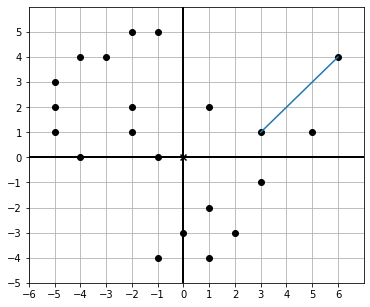

In [22]:
from vector_drawing import *

dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4), 
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3), 
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(Points(*dino_vectors), Segment((6,4), (3,1)))

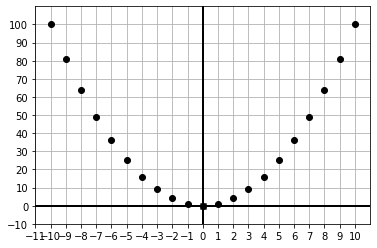

In [23]:
draw(
    Points(*[(x,x**2) for x in range(-10,11)]),
    grid=(1,10),
    nice_aspect_ratio=False
)

In [24]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

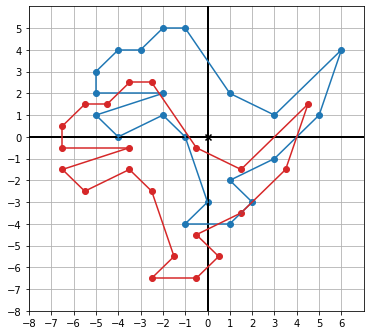

In [25]:
dino_vectors2 = [add((-1.5, -2.5), v) for v in dino_vectors]

draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

In [27]:
from math import sqrt

def length(v):
    return sqrt(v[0]**2 + v[1]**2)

In [29]:
def multiple_add(*vectors):
    return (sum([v[0] for v in vectors]), sum(v[1] for v in vectors))

In [107]:
def translate(translation, vectors):
    return [multiple_add(translation, v) for v in vectors]

In [31]:
translate((1,1), [(0,0), (0,1), (-3,3)])

[(1, 1), (1, 2), (-2, 4)]

In [36]:
def hundred_dinos():
    translations = [(12*x, 10*y) for x in range(-5,5) for y in range(-5,5)]
    dinos = [Polygon(*translate(t, dino_vectors), color=blue) for t in translations]
    draw(*dinos, grid=None, axes=None, origin=None)

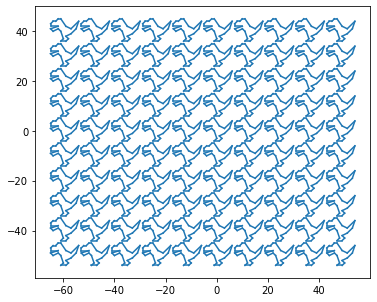

In [37]:
hundred_dinos()

In [38]:
def scale(scalar, v):
    return (scalar * v[0], scalar * v[1])

In [39]:
scale(3, (-2,2))

(-6, 6)

In [69]:
def subtract(*vectors):
    for i in range(len(vectors)):
        return (vectors[i][0] - vectors[i+1][0], vectors[i][1] - vectors[i+1][1])

In [71]:
subtract((3,2), (1,1))

2.23606797749979

In [72]:
#Trigonometric Relations and Polar Coordinates

from math import sin, cos

def to_cartesian(polar_vector):
    length, angle = polar_vector[0], polar_vector[1]
    
    return (length * cos(angle), length * sin(angle))

In [74]:
from math import pi

angle = 37*pi/180
to_cartesian((5, angle))

(3.993177550236464, 3.0090751157602416)

In [92]:
from math import atan2

def to_polar(vector):
    x, y = vector[0], vector[1]
    angle = atan2(y,x)
    return (length(vector), angle)

In [94]:
to_polar((4,3))

(5.0, 0.6435011087932844)

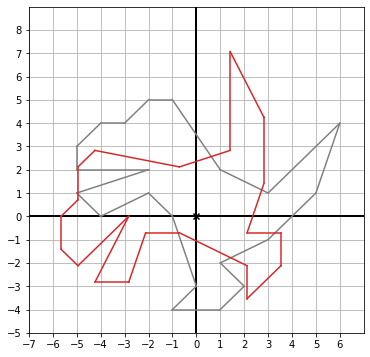

In [125]:
#Rotation

def rotate_and_draw(angle, mass):
    rotation_angle = angle
    polar = [to_polar(v) for v in mass]
    rotated_polar = [(l, angle + rotation_angle) for l, angle in polar]
    rotated = [to_cartesian(p) for p in rotated_polar]

    draw(Polygon(*mass, color=gray), Polygon(*rotated, color=red))
    
rotate_and_draw(pi/4, dino_vectors)  

In [124]:
def rotate(angle, vectors):
    polars = [to_polar(v) for v in vectors]
    return [to_cartesian((l, a+angle)) for l,a in polars]


rotate(pi/4, dino_vectors)

[(1.4142135623730963, 7.071067811865475),
 (1.4142135623730954, 2.8284271247461903),
 (-0.7071067811865474, 2.121320343559643),
 (-4.242640687119285, 2.8284271247461894),
 (-4.949747468305833, 2.121320343559643),
 (-4.949747468305833, 0.7071067811865486),
 (-5.656854249492381, 6.927648449883947e-16),
 (-5.656854249492381, -1.4142135623730947),
 (-4.949747468305833, -2.1213203435596415),
 (-2.8284271247461903, 3.4638242249419736e-16),
 (-4.242640687119285, -2.8284271247461907),
 (-2.8284271247461907, -2.82842712474619),
 (-2.121320343559643, -0.7071067811865472),
 (-0.7071067811865477, -0.7071067811865475),
 (2.121320343559643, -2.121320343559643),
 (2.1213203435596424, -3.5355339059327378),
 (3.5355339059327373, -2.121320343559643),
 (3.5355339059327373, -0.7071067811865476),
 (2.1213203435596424, -0.7071067811865475),
 (2.8284271247461903, 1.4142135623730951),
 (2.82842712474619, 4.242640687119285)]

In [116]:
new_dino = translate((8,8), rotate(5 * pi/3, dino_vectors))

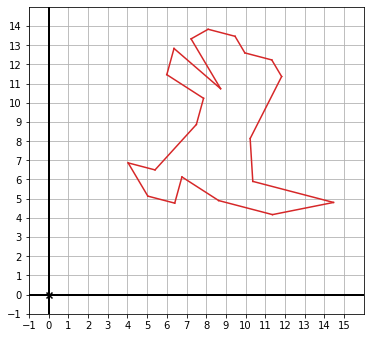

In [121]:
draw(Polygon(*new_dino, color=red))